In [1]:
import pandas as pd
import scraper

from IPython.display import display, HTML

                                              Titles
0  Reddit may force Apollo and third-party client...
1  Popular iOS Reddit client Apollo will shut dow...
2  r/Apple will be joining the blackout to protes...
3                           Goodbye Apollo 2017-2023
4  Reddit's CEO really wants you to know that he ...


In [2]:
# fetch_data(reddit, FILE)
headlines = scraper.load_data("data.txt")

# create a data frame
apple_df = pd.DataFrame(headlines)
apple_df.columns = ["Titles"]

# data cleaning and transformation
apple_df.Titles.duplicated().sum()
apple_df["Titles"]= apple_df["Titles"].apply(scraper.clean_text)
     
# cleaning the text
apple_df["Titles"]= apple_df["Titles"].apply(scraper.remove_emoji)

# show the clean text
display(HTML(apple_df.head().to_html()))

,Titles
0,"Reddit may force Apollo and third-party clients to shut down, asking for $20M per year API fee"
1,Popular iOS Reddit client Apollo will shut down on June 30.
2,r/Apple will be joining the blackout to protest Reddit killing 3rd Party Apps such as Apollo
3,Goodbye Apollo 2017-2023
4,Reddit's CEO really wants you to know that he doesn't care about your feedback


In [3]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [4]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity


In [5]:
#Now we create a new column for what we just did and add it to the Tweet_df dataframe
apple_df["Subjectivity"] = apple_df["Titles"].apply(getSubjectivity)
apple_df["Polarity"] = apple_df["Titles"].apply(getPolarity)
#Now display data
display(HTML(apple_df.head().to_html()))

,Titles,Subjectivity,Polarity
0,"Reddit may force Apollo and third-party clients to shut down, asking for $20M per year API fee",0.288889,-0.155556
1,Popular iOS Reddit client Apollo will shut down on June 30.,0.594444,0.222222
2,r/Apple will be joining the blackout to protest Reddit killing 3rd Party Apps such as Apollo,0.250000,0.000000
3,Goodbye Apollo 2017-2023,0.000000,0.000000
4,Reddit's CEO really wants you to know that he doesn't care about your feedback,0.100000,0.200000


In [6]:
def getInsight(score): 
    if score < 0: return "Negative"
    elif score == 0:  return "Neutral"
    else: return "Positive"
 
apple_df["Insight"] = apple_df["Polarity"].apply(getInsight)
display(HTML(apple_df.head(50).to_html()))

,Titles,Subjectivity,Polarity,Insight
0,"Reddit may force Apollo and third-party clients to shut down, asking for $20M per year API fee",0.288889,-0.155556,Negative
1,Popular iOS Reddit client Apollo will shut down on June 30.,0.594444,0.222222,Positive
2,r/Apple will be joining the blackout to protest Reddit killing 3rd Party Apps such as Apollo,0.250000,0.000000,Neutral
3,Goodbye Apollo 2017-2023,0.000000,0.000000,Neutral
4,Reddit's CEO really wants you to know that he doesn't care about your feedback,0.100000,0.200000,Positive
5,"Reddit's CEO responds to a thread discussing his attempt to discredit Apollo with ""His ""joke is the least of our issues.""",0.400000,-0.300000,Negative
6,Apollo Is a Work of Art,0.000000,0.000000,Neutral
7,"This is Apple Vision Pro, the mixed reality headset",0.250000,0.000000,Neutral
8,Reddit plagued with 1-star App Store reviews over API debacle as users search for 0-star button,0.000000,0.000000,Neutral
9,Apollo dev “I want to debunk Reddit’s claims”,0.000000,0.000000,Neutral


In [7]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

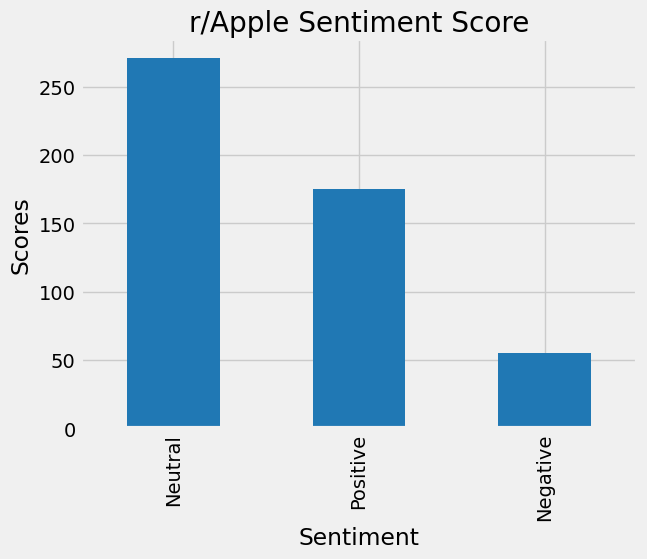

In [8]:
plt.title("r/Apple Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
apple_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

In [9]:
stopwords = STOPWORDS
print(stopwords)

{'has', "don't", 'themselves', 'no', 'could', "he's", 'had', 'these', 'our', 'while', 'its', "mustn't", 'such', 'if', 'out', 'theirs', 'but', 'in', 'after', 'shall', 'doing', "why's", 'www', "who's", 'during', 'her', 'was', 'other', "she's", 'she', 'been', 'their', 'who', 'http', 'be', "that's", 'else', 'my', 'do', 'where', 'did', "he'll", 'himself', 'into', 'k', "she'll", 'under', 'would', 'hers', 'ought', "haven't", 'than', 'am', 'can', "let's", 'we', 'get', 'up', 'yourselves', "they'll", 'too', 'so', 'because', 'com', "how's", "here's", 'ever', 'which', 'when', 'his', "they've", 'then', 'him', "i'm", 'them', 'very', "weren't", 'ours', 'only', 'any', 'since', 'to', "we're", "you'll", "you've", 'at', 'an', 'above', 'also', 'there', 'your', 'myself', "you're", "what's", "she'd", "hasn't", "isn't", 'were', 'they', 'off', 'why', 'a', 'here', 'from', 'some', 'are', "couldn't", 'the', "where's", "he'd", 'nor', "we'll", 'more', 'whom', 'about', 'below', 'through', "they'd", "shouldn't", "di

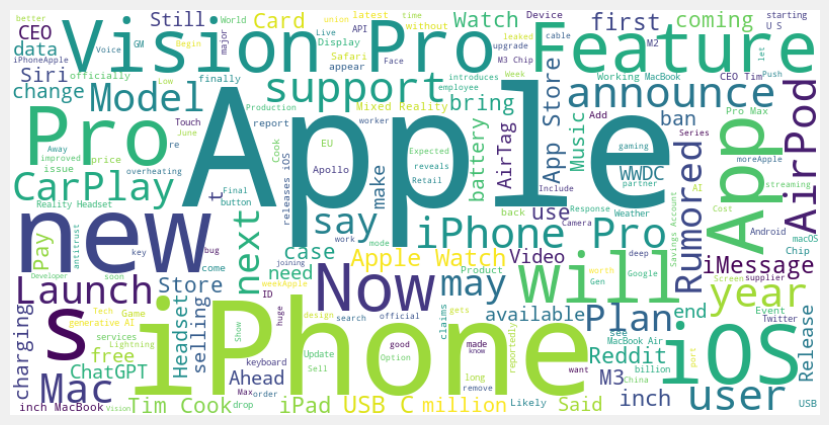

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Your text data
text = "".join([twts for twts in apple_df["Titles"]])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the generated word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.show()